<a href="https://colab.research.google.com/github/mtfbs/2Dsim_logStatistics/blob/master/M%C3%A9todos_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1) $y' = y$ com $y(0) = 1$ para encontrar um $y(t)$ muito familiar

#### Solução analítica

$dy/dx = y$

$(dy/dx)/y = y/y$

$(dy/dx)/y = 1$

$\int(dy/dx)/y * dx= \int 1 dx$

$log(y(x)) = x + c$

$y(x) = exp(x + c)$

$y(x) = c*exp(x)$




Os dois gráficos se alinham perfeitamente, como esperado.


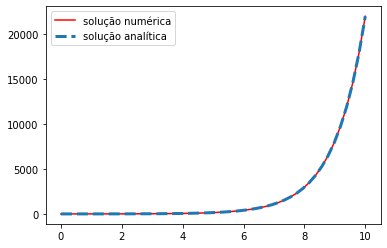

In [92]:
## Solução numérica (gráfico em vermelho)
def derivative(y,x): return y

def sol(x, y0):
  return odeint(derivative, y0, x)

y0 = 1
x = np.linspace(0, 10)
y = sol(x, y0)
plt.plot(x,y, color="red")

## Solução analítica (gráfico tracejado em azul)
y = y0*np.exp(x)
plt.plot(x,y, '--', linewidth=3)
plt.legend(["solução numérica", "solução analítica"])

print("Os dois gráficos se alinham perfeitamente, como esperado.")


# 2) $y' = 1$ com $y(0) = 4$, uma pergunta trivial

#### Solução analítica

$y' = 1$

$\int dy/dx * dx = \int 1 dx$

$y = x + c$



Os dois gráficos se alinham perfeitamente, como esperado.


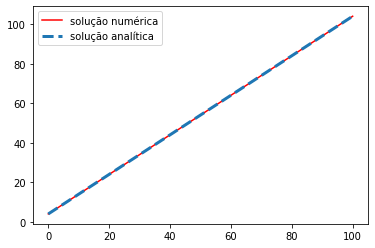

In [90]:
## Solução numérica (gráfico em vermelho)
def derivative(y,x): return 1

def sol(x, y0):
  return odeint(derivative, y0, x)

y0 = 4
x = np.linspace(0, 100)
y = sol(x, y0)
plt.plot(x,y, color="red")

## Solução analítica (gráfico tracejado em azul)
y = x + y0
plt.plot(x,y, '--', linewidth=3)
plt.legend(["solução numérica", "solução analítica"])

print("Os dois gráficos se alinham perfeitamente, como esperado.")


# 3) $y'-6y = exp(-t)$, $y(0) = 2$

#### Solução analítica

$y' - 6y = exp(-t)$

seja $u(t)=exp(\int -6 dt) = epx(-6t)$,

multiplicando $u(t)$ nos dois lados, temos:

$exp(-6t) dy/dt - (6epx(-6t)) y = epx(-7t)$

substituindo $-6*exp(-6t)$ por $d(exp(-6t))/dt$, temos:

$exp(-6t) dy/dt + d(exp(-6t))/dt * y = exp(-7t)$

voltando pela regra do produto à esquerda e integrando nos dois lados, temos:

$\int d(exp(-6t) * y)/dt * dt = \int exp(-7t) * dt$

$exp(-6t)*y = (-1/7)*exp(-7t) + c$

Os dois gráficos se alinham perfeitamente, como esperado.


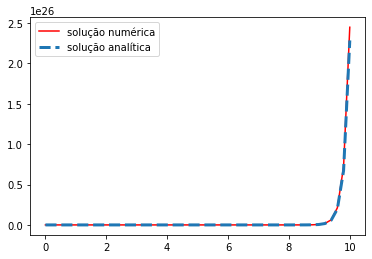

In [112]:
## Solução numérica (gráfico em vermelho)
def derivative(y,t): return np.exp(-t) + 6*y

def sol(t, y0):
  return odeint(derivative, y0, t)

y0 = 2
t = np.linspace(0, 10)
y = sol(t, y0)
plt.plot(t,y, color="red")

## Solução analítica (gráfico tracejado em azul)
y = np.exp(6*t)*((-1/7) * np.exp(-7*t) + y0)
plt.plot(t,y, '--', linewidth=3)
plt.legend(["solução numérica", "solução analítica"])

print("Os dois gráficos se alinham perfeitamente, como esperado.")


# 4) $y'' + 9y = 1$, $y(0)=y'(0)=0$


#### Solução analítica

substituindo com $exp(lx)$:

$l^2 * exp(.*x) + 9*(exp(l*x))= 0$

$(l^2 + 9)*exp(l*x) = 0$

temos então que
$l = 3i$ ou $l = -3i$

achando a solução geral:
$y = c_1*exp(3ix) + c_2*exp(-3ix)$

aplicando identidade de Euler:

$y = c_1(cos(3x) + i*sin(3x)) + c_2(cos(3x) - i*sin(3x))$

$y = (c_1 + c_2)cos(3x)+i(c_1-c_2)sin(3x)$

$y = c_1cos(3x) + c_2sin(3x)$

encontrando solução particular $y_p(x) = a$:

$d^2y_p(x)/dx^2 = d^2(a)/dx^2 = 0$

$d^2y_p(x)/dx^2 + 9y_p(x) = 1$

$9a = 1$

$a = 1/9$

então:
$y_p(x) = 1/9$

a solução geral é a soma da complementar + a particular:
$y = c_1cos(3x) + c_2sin(3x) + 1/9$

resolvendo:

$d(c_1cos(3x) + c_2sin(3x) + 1/9)/dx$

aplicando o valor inicial y(0):
$c_1 + 1/9 = 0$

apliacndo a deriavda de y com o estado inicial:
$3c_2 = 0$

Tendo agora as constantes, basta substituir:
$y = 2/9 * sin^2(3x/2)$

---

#### Para a solução numérica, podemos considerar:
$z = y' -> z' + 9y = 1$, com $y(0) = z(0) = 0$

$z' = 1 - 9y$

Os dois gráficos se alinham perfeitamente, como esperado.


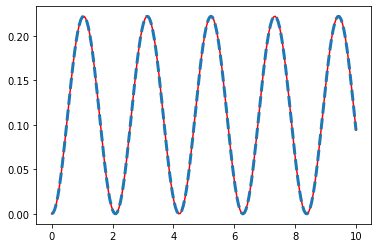

In [150]:
def derivative(U, x):
  # sendo U um vetor  de talfroma que y=U[0] e z=U[1]. A função deve retornar [y', z']
  return [U[1], 1 - 9*U[0]]

U0 = [0,0]
xs = np.linspace(0, 10, 200)
Us = odeint(derivative, U0, xs)
ys = Us[:,0]

plt.plot(xs, ys, color="red")

y = 2/9 * np.sin(3*xs/2) * np.sin(3*xs/2)

plt.plot(xs,y, '--', linewidth=3)


print("Os dois gráficos se alinham perfeitamente, como esperado.")
